In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

#Data Cleanup
df = pd.read_csv(r"SuperStoreOrders.csv")
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')
df['sales']=df['sales'].str.replace(',','').astype('int64')
# operating on the assumption that the sales and profit column are in dollars

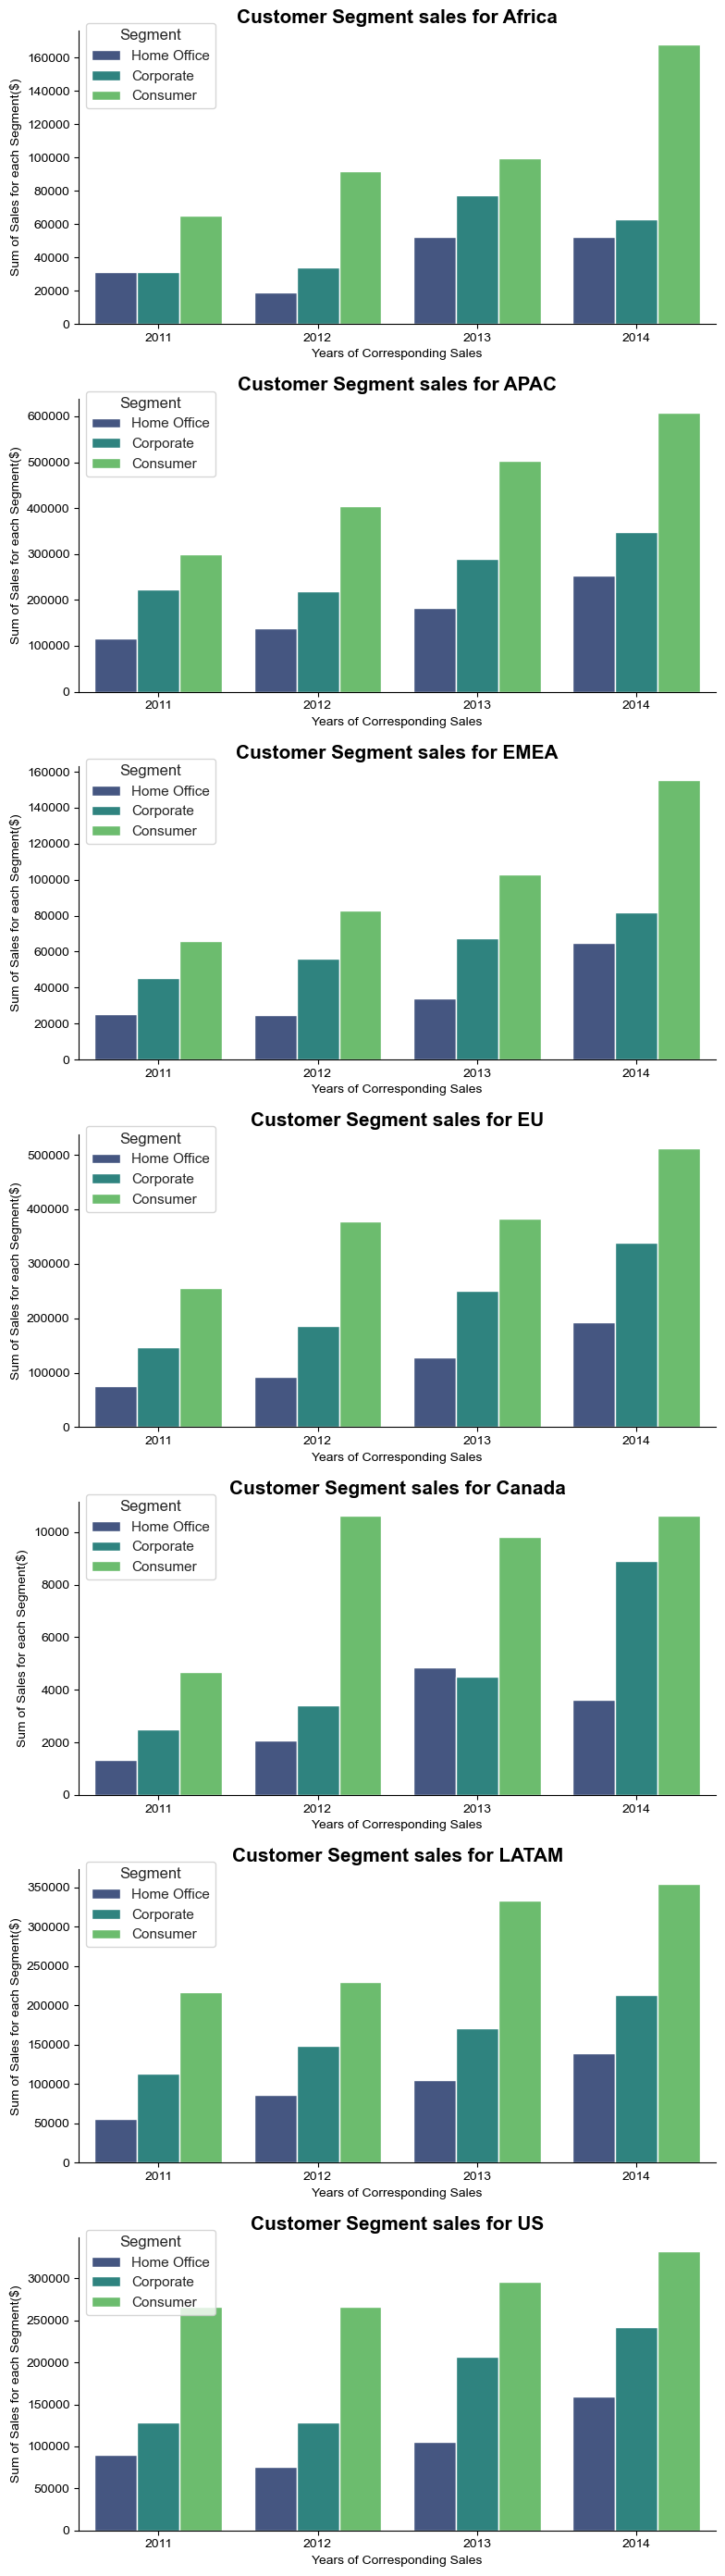

In [2]:
df_piv = df.pivot_table(values='sales',index=['market','year'],columns='segment',aggfunc='sum').sort_values(by='market')
df_Africa = df[df['market'] == 'Africa']

l_markets=len(df['market'].unique())
markets=df['market'].unique()
fig,ax =plt.subplots(l_markets,1,figsize=(8, 4 *l_markets),sharex=False)

sns.despine()
sns.set_theme(style='ticks')
h_order= ['Home Office','Corporate','Consumer']

for i,market in enumerate(markets):
    df_market = df[df['market']==market]
    df_market_grp =df_market.groupby(['segment','year'])['sales'].sum().to_frame()
    sns.barplot(data=df_market_grp,x='year',y='sales',ax=ax[i],hue='segment',hue_order=h_order,palette='viridis')
    ax[i].set_title(f'Customer Segment sales for {market}',fontsize=15,fontweight='bold')
    ax[i].set_ylabel('Sum of Sales for each Segment($)')
    ax[i].set_xlabel('Years of Corresponding Sales')
    ax[i].legend(title='Segment', bbox_to_anchor=(0, 1.05), loc='upper left')
    plt.subplots_adjust(hspace=0.7)
    
fig.tight_layout()
plt.show()
